In [77]:
import pandas as pd
from IPython.display import display
from openpyxl import load_workbook

import lightgbm as lgb
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio

In [131]:
columns = ['year',
 'monthly_insurance',
 'revenue_all',
 'insurance_income',
 'national_treasury',
 'income_operation',
 'income_other',
 'expense_all',
 'benefit',
 'pension_contributions',
 'expense_other',
 'bad_1',
 'target',
 'target_2',
 'bad_2',
 'bad_3',
 'bad_4',
 'bad_5',
 'revenue_man',
 'bad_6',
 'bad_7',
 'bad_8'
]

In [132]:
a = load_workbook('data/a.xlsx')["国民年金"]
b = load_workbook('data/b.xlsx')["国民年金"]
c = load_workbook('data/c.xlsx')["国民年金"]
d = load_workbook('data/d.xlsx')["国民年金"]
e = load_workbook('data/e.xlsx')["国民年金"]
f = load_workbook('data/f.xlsx')["国民年金"]

In [133]:
def proc_ws(ws):
    df = pd.DataFrame(ws.values, dtype=float).loc[20:112, [i for i in range(24) if i is not 0 and i is not 16]]
    df.columns = columns
    return df

In [134]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [135]:
aws = proc_ws(a)
bws = proc_ws(b)
cws = proc_ws(c)
dws = proc_ws(d)
ews = proc_ws(e)
fws = proc_ws(f)

In [136]:
gws = pd.concat([aws, bws, cws, dws, ews, fws])

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
gws = gws.astype(float)

In [139]:
gws.to_csv('output/gws.csv', index=False)

In [140]:
gws = pd.read_csv('output/gws.csv', encoding='utf8')

In [148]:
gws.drop(columns=['target_2', 'bad_1', 'bad_2', 'bad_3', 'bad_4', 'bad_5', 'bad_6', 'bad_7', 'bad_8'], inplace=True)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(gws.drop(columns=['target']), gws['target'])

In [151]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [152]:
params = {'task': 'train',
          'boosting_type': 'gbdt',
          'objective': 'regression',
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0}

In [153]:
X_train

,year,monthly_insurance,revenue_all,insurance_income,national_treasury,income_operation,income_other,expense_all,benefit,pension_contributions,expense_other,revenue_man
325,2064.0,16900.0,10.450723,3.181943,6.023489,1.245292,0.000000e+00,10.117721,0.046833,10.034534,0.036354,70.712356
210,2042.0,16900.0,6.997029,2.357829,3.702994,0.936195,1.117153e-05,6.379447,0.062128,6.268841,0.048478,51.857010
503,2056.0,16900.0,7.341368,2.625352,4.182358,0.533657,0.000000e+00,7.194373,0.055017,7.091953,0.047403,55.373444
282,2021.0,16900.0,4.501317,1.676468,2.350392,0.456177,1.827932e-02,4.365117,0.094368,4.199619,0.071130,35.950154
22,2040.0,16900.0,7.633599,2.572777,3.972877,1.087925,2.082724e-05,6.874541,0.065854,6.758518,0.050169,54.009568
537,2090.0,16900.0,10.583243,3.714292,6.268065,0.600886,0.000000e+00,10.605719,0.040267,10.536476,0.028976,85.462488
458,2104.0,16900.0,12.461235,3.936778,7.785476,0.738981,0.000000e+00,13.074656,0.029806,13.024723,0.020127,104.952491
357,2096.0,16900.0,16.487827,5.143053,10.014196,1.330577,0.000000e+00,16.812160,0.034132,16.755205,0.022823,116.700291
289,2028.0,16900.0,5.099430,1.922922,2.617620,0.557113,1.774377e-03,4.735325,0.080706,4.591019,0.063600,40.358706
416,2062.0,16900.0,8.459962,2.596962,4.913014,0.949987,0.000000e+00,8.270882,0.046899,8.186540,0.037443,61.400503


In [154]:
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=20)

/Users/shunkakinoki/pension/.venv/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_iteration` in params. Will use it instead of argument



[1]	valid_0's l2: 230.108
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l2: 220.965
[3]	valid_0's l2: 212.202
[4]	valid_0's l2: 203.792
[5]	valid_0's l2: 195.756
[6]	valid_0's l2: 187.914
[7]	valid_0's l2: 180.499
[8]	valid_0's l2: 173.382
[9]	valid_0's l2: 166.575
[10]	valid_0's l2: 159.912
[11]	valid_0's l2: 153.65
[12]	valid_0's l2: 147.586
[13]	valid_0's l2: 141.737
[14]	valid_0's l2: 136.166
[15]	valid_0's l2: 130.768
[16]	valid_0's l2: 125.639
[17]	valid_0's l2: 120.67
[18]	valid_0's l2: 115.932
[19]	valid_0's l2: 111.381
[20]	valid_0's l2: 107.024
[21]	valid_0's l2: 102.76
[22]	valid_0's l2: 98.7412
[23]	valid_0's l2: 94.8273
[24]	valid_0's l2: 91.1092
[25]	valid_0's l2: 87.4984
[26]	valid_0's l2: 84.0732
[27]	valid_0's l2: 80.7643
[28]	valid_0's l2: 77.607
[29]	valid_0's l2: 74.5454
[30]	valid_0's l2: 71.6115
[31]	valid_0's l2: 68.8138
[32]	valid_0's l2: 66.0961
[33]	valid_0's l2: 63.4913
[34]	valid_0's l2: 61.0039
[35]	valid_0's l2: 58.605
[36]	val

In [168]:
importance = pd.DataFrame(model.feature_importance(), index=gws.drop(columns=['target']).columns, columns=['importance'])

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import japanize_matplotlib
warnings.simplefilter(action='ignore', category=FutureWarning)

In [181]:
importance['value'] = importance.index

In [182]:
japanese_convert = {'year':'年度',
  'monthly_insurance' :'保険料月額',
  'revenue_all' :'収入合計',
  'insurance_income' : '保険料収入',
  'national_treasury': '国庫負担',
  'income_operation':'運用収入',
  'income_other' :'その他収入',
  'expense_all' :'支出合計',
  'benefit' : '給付費',
  'pension_contributions' : '基礎年金拠出金',
  'expense_other':'その他支出',
  'revenue_man':'現役男子の手取り収入'
}

In [183]:
importance['value'] = importance['value'].map(japanese_convert)

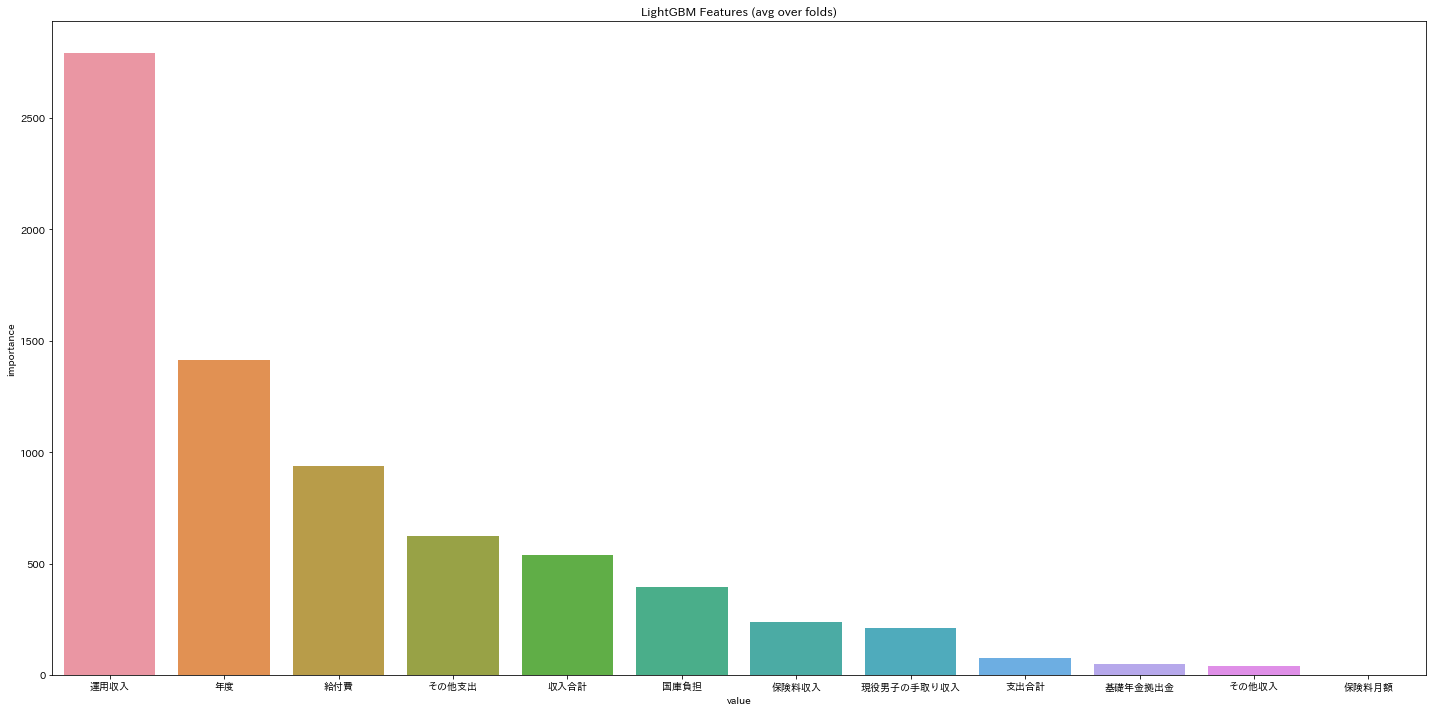

<Figure size 432x288 with 0 Axes>

In [184]:
plt.figure(figsize=(20, 10))
sns.barplot(x="value", y="importance", data=importance.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('output/lgb_importances.png')